In [1]:
import sys

sys.path.append('../GraphStructureLearning')

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

from glob import glob
import pickle
import yaml
from easydict import EasyDict as edict

from torch_geometric.utils import to_dense_adj, dense_to_sparse

In [41]:
adj_matrix = np.load('./data/METR-LA/adj_mat.npy')

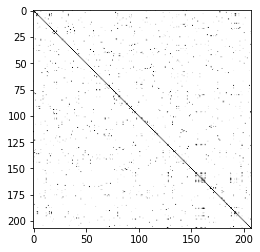

In [46]:
plt.imshow(adj_matrix, cmap='Greys')

In [14]:
exp_dirs = glob('./exp/*')
exp_dirs.sort()
exp_dirs

['./exp\\GTS_METR_LA_0321_024132']

In [15]:
exp = exp_dirs[0]

In [16]:
config_file = glob(exp+'/*.yaml')[0]
config = edict(yaml.load(open(config_file, 'r'), Loader=yaml.FullLoader))

In [17]:
train_result_dirs = glob(exp+'/training_result.pickle')
train_result = pickle.load(open(train_result_dirs[0], 'rb'))

test_result_dirs = glob(exp+'/test_result.pickle')
test_result = pickle.load(open(test_result_dirs[0], 'rb'))

In [19]:
train_result.keys()

dict_keys(['train_loss', 'val_loss', 'val_adj_matirix'])

In [20]:
test_result.keys()

dict_keys(['test_loss', 'adj_matrix', 'prediction', 'target'])

In [23]:
train_result['train_loss']

[0.39367231726646423, 0.3808380663394928]

In [24]:
train_result['val_loss']

[0.35051852464675903, 0.33651840686798096]

In [27]:
train_result['val_adj_matirix'][1].shape

torch.Size([2, 31848])

In [35]:
test_result['target'][0].shape

torch.Size([207, 3])

In [33]:
test_result['prediction'][0].shape

torch.Size([207, 3])

In [36]:
test_result['test_loss']

[2.672299385070801]

In [39]:
test_result['adj_matrix'].shape

torch.Size([2, 31398])

In [49]:
adj = to_dense_adj(test_result['adj_matrix'])

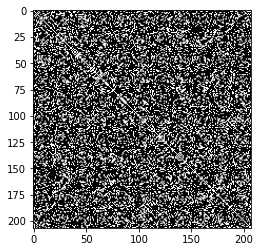

In [52]:
plt.imshow(adj[0], cmap='Greys')

In [57]:
adj_matrix2, _ = dense_to_sparse(torch.Tensor(adj_matrix))

In [59]:
adj_matrix2.shape

torch.Size([2, 1722])